<a href="https://colab.research.google.com/github/Polae-Bear-200/assignment1/blob/main/daicomplete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
df=pd.read_csv('train.csv') #loading the dataset

In [ ]:
display(df.info(),df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


None

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


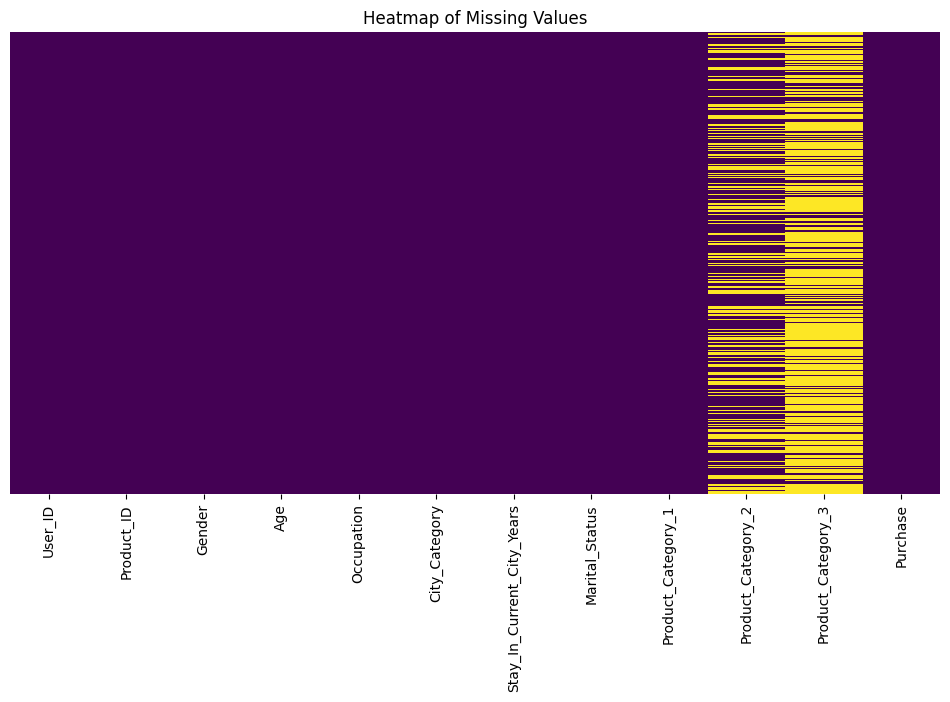

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

In [ ]:
df = df.drop(columns=['Product_Category_3'])

In [ ]:
df.nunique()

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category_1,20
Product_Category_2,17


So we have 5891 customers and 3631 products now lets se for other features

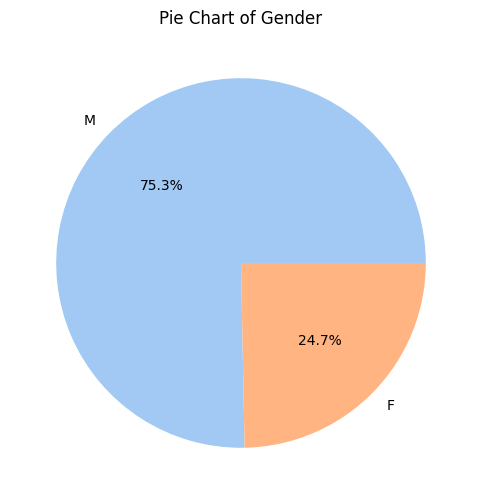

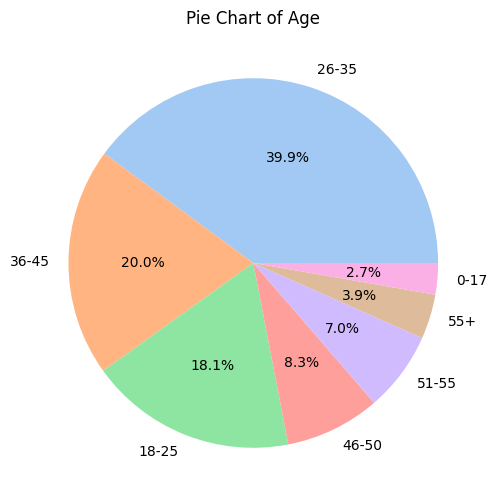

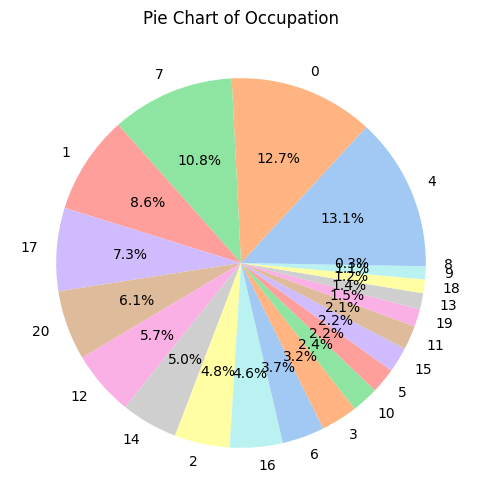

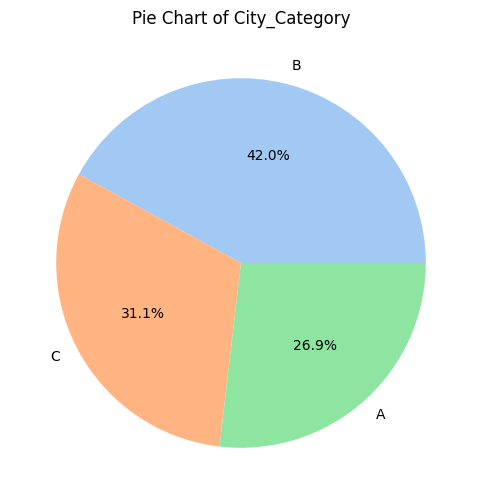

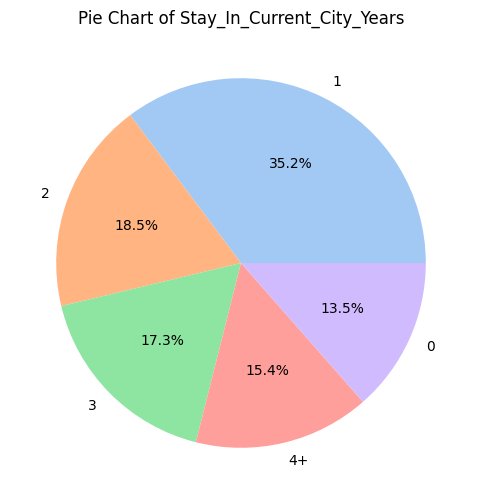

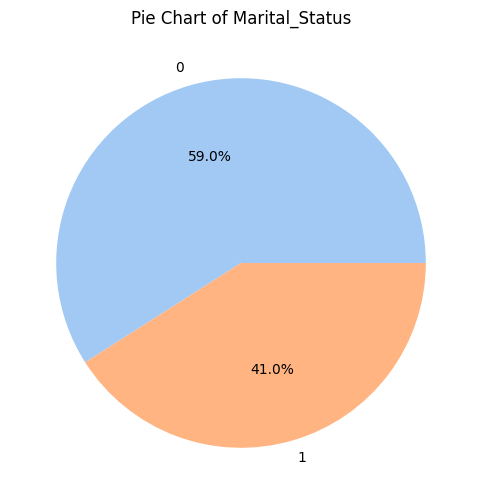

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns you want to visualize
columns = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
colors = sns.color_palette('pastel')
for col in columns:
    column_data = df[col].value_counts()
    plt.figure(figsize=(6, 6))  # Set figure size
    plt.pie(column_data, labels=column_data.index,autopct='%1.1f%%', colors=colors)

    plt.title(f'Pie Chart of {col}')
    plt.show()


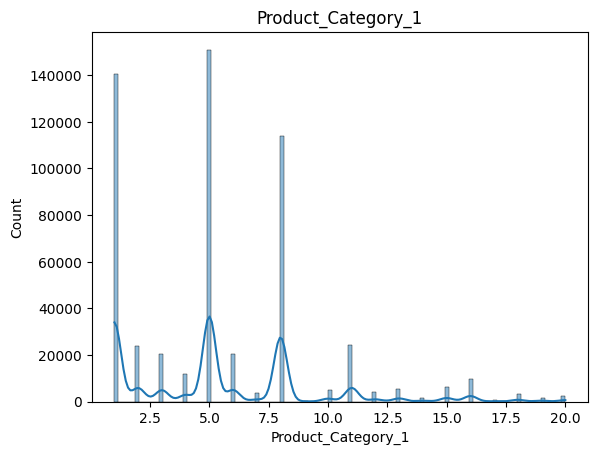

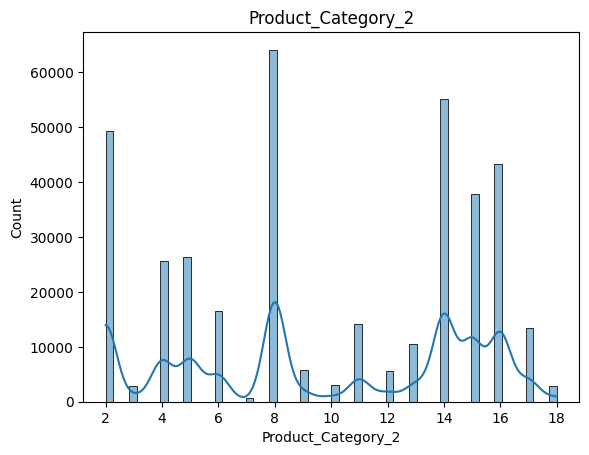

In [ ]:
sns.histplot(df['Product_Category_1'], kde=True); plt.title('Product_Category_1'); plt.show()
sns.histplot(df['Product_Category_2'], kde=True); plt.title('Product_Category_2'); plt.show()

**BIVARIATE**

In [ ]:

# Cross-tabulation between Age and Gender
cross_tab = pd.crosstab(df['Age'], df['Gender'])
print(cross_tab)
from scipy.stats import chi2_contingency

# Perform Chi-Square test between Gender and Age
chi2_stat, p_val, dof, expected = chi2_contingency(pd.crosstab(df['Gender'], df['Age']))

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")
# Perform Chi-Square test between Occupation and Marital_Status
chi2_stat, p_val, dof, expected = chi2_contingency(pd.crosstab(df['Occupation'], df['Marital_Status']))
print(f"Chi-Square Statistic: {chi2_stat}, P-Value: {p_val}")

Gender      F       M
Age                  
0-17     5083   10019
18-25   24628   75032
26-35   50752  168835
36-45   27170   82843
46-50   13199   32502
51-55    9894   28607
55+      5083   16421
Chi-Square Statistic: 1412.7156576195039
P-Value: 4.2750569064909935e-302
Chi-Square Statistic: 18710.023962434694, P-Value: 0.0


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


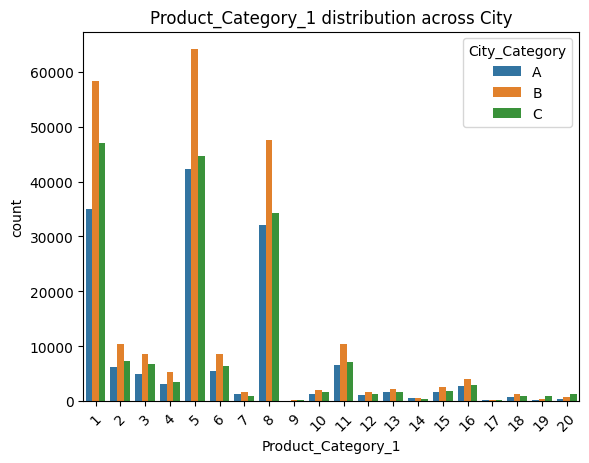

In [ ]:
sns.countplot(hue='City_Category', x='Product_Category_1', data=df)
plt.title('Product_Category_1 distribution across City')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


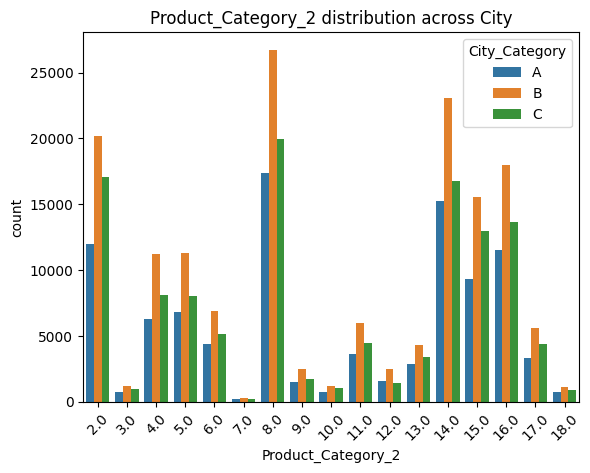

In [ ]:
sns.countplot(hue='City_Category', x='Product_Category_2', data=df)
plt.title('Product_Category_2 distribution across City')
plt.xticks(rotation=45)
plt.show()

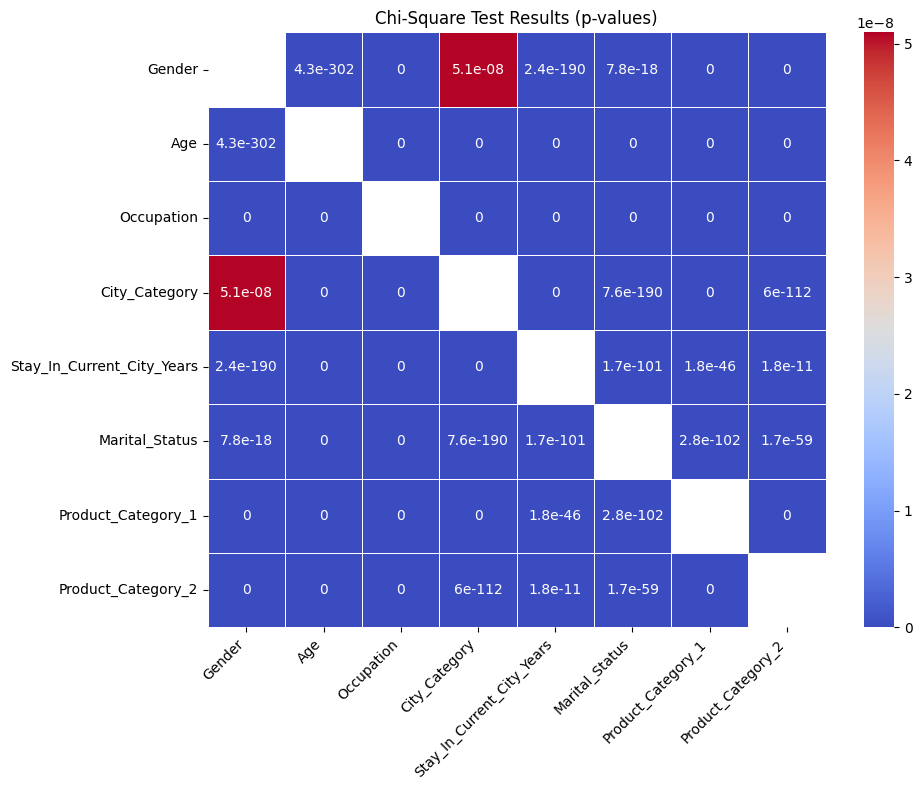

In [ ]:

from scipy.stats import chi2_contingency

# List of categorical columns
categorical_columns = ['Gender', 'Age', 'Occupation', 'City_Category',
                       'Stay_In_Current_City_Years', 'Marital_Status',
                       'Product_Category_1', 'Product_Category_2']

# Create an empty DataFrame to store p-values from the Chi-Square test
chi2_results = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Apply Chi-Square test to each pair of categorical variables
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            # Create a contingency table for the two variables
            contingency_table = pd.crosstab(df[col1], df[col2])
            # Perform the Chi-Square test
            chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
            # Store the p-value in the results DataFrame
            chi2_results.loc[col1, col2] = p_val
        else:
            # Set diagonal to NaN because we don't test a variable against itself
            chi2_results.loc[col1, col2] = None

# Convert the p-values to floats
chi2_results = chi2_results.astype(float)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(chi2_results, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Chi-Square Test Results (p-values)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
df['Product_Category_2'].fillna(0, inplace=True)


<ipython-input-15-fb71a2e86ba3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Category_2'].fillna(0, inplace=True)


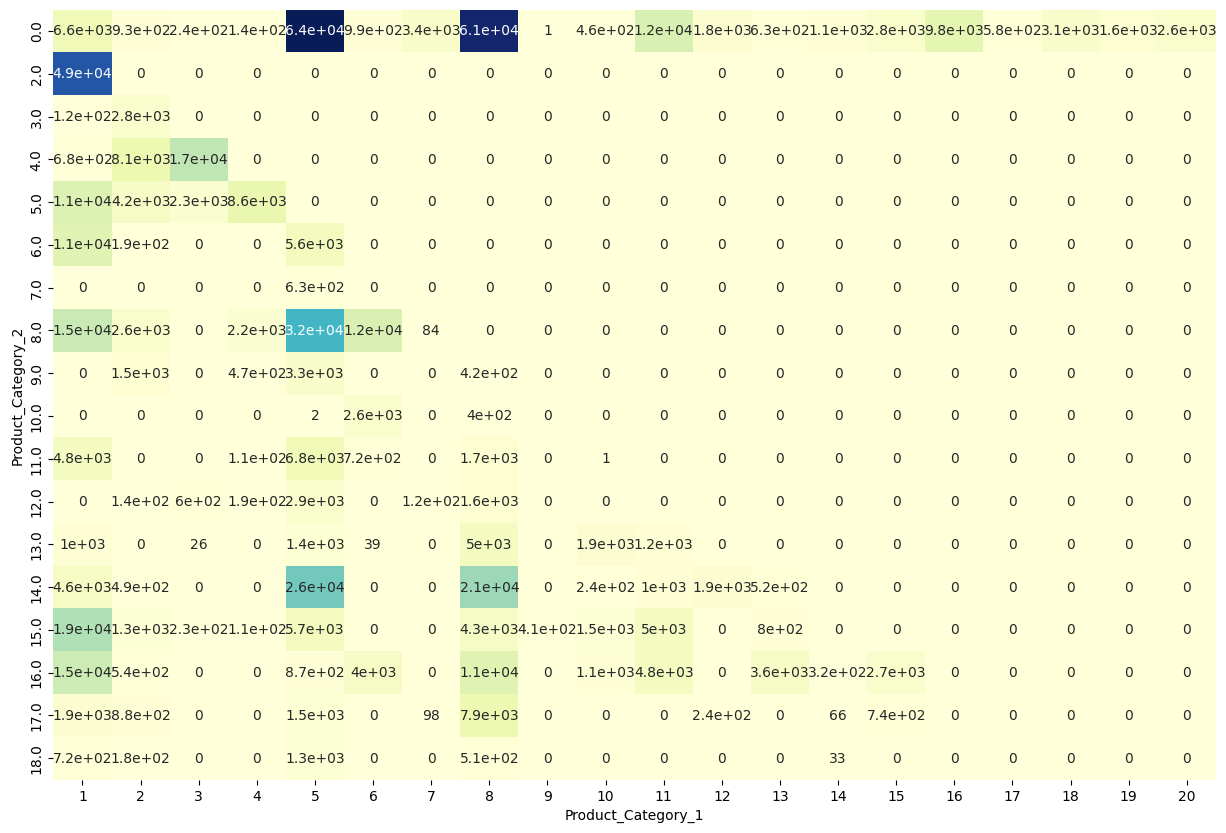

In [ ]:
plt.figure(figsize=(15, 10))
contingency_table = pd.crosstab(df['Product_Category_2'], df['Product_Category_1'])
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", cbar=False)
plt.show()

biavariate on categorical and numerical

firstly creating boxplot of purchase with respect to 'Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status','Product_Category_1'

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

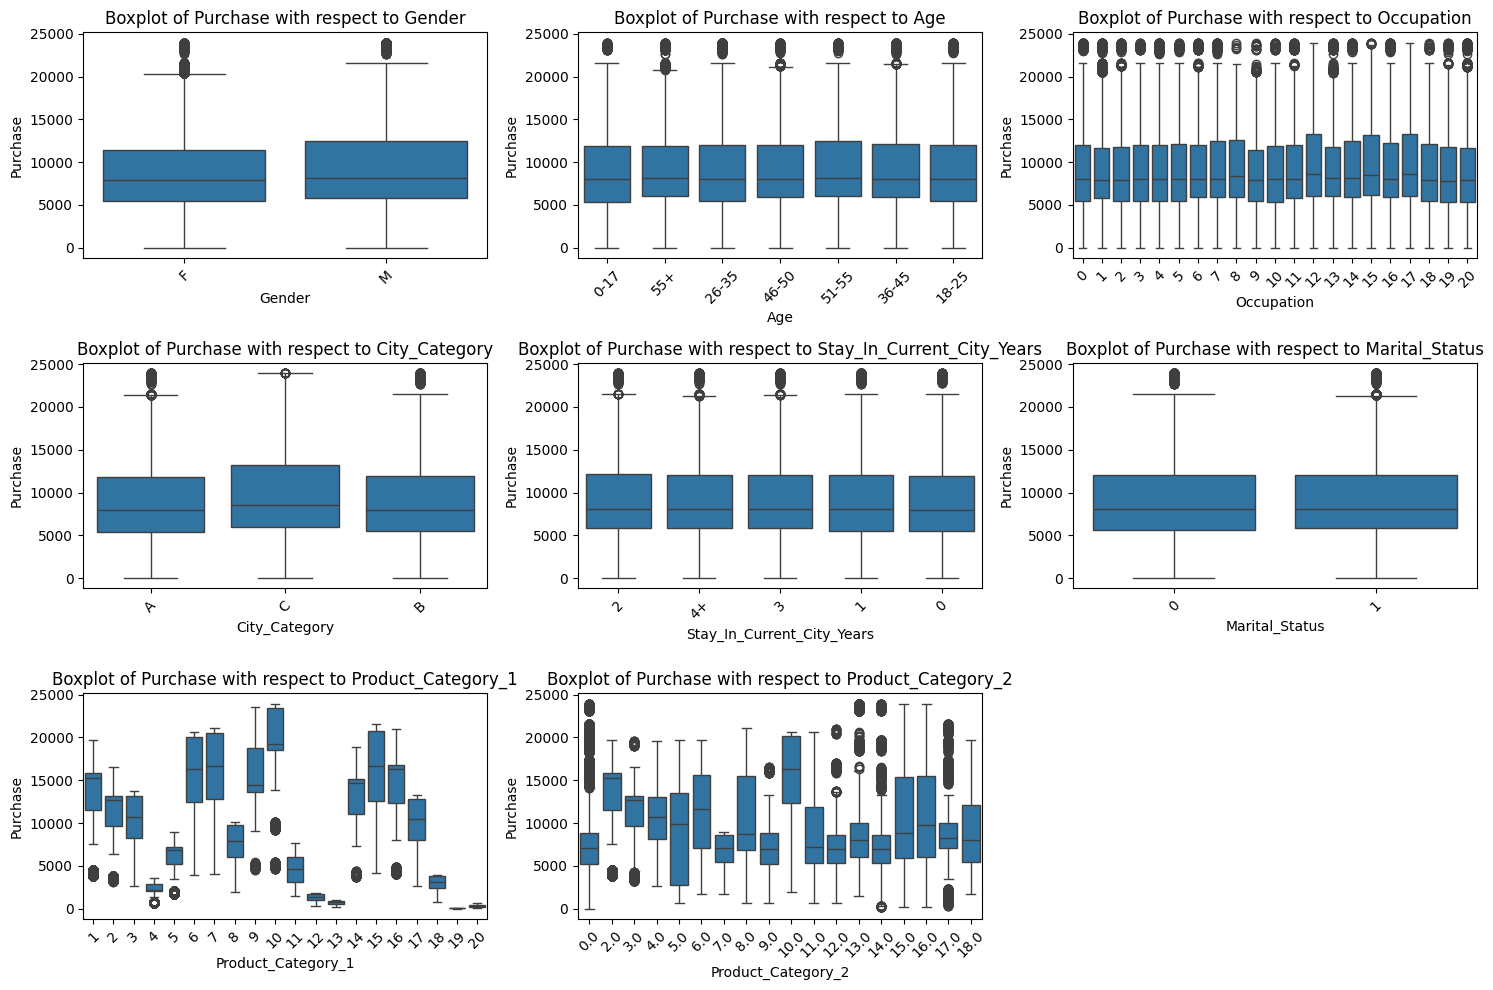

In [ ]:
plt.figure(figsize=(15, 10))

# Loop over each categorical column and create a boxplot
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)  # Adjust rows and columns as necessary
    sns.boxplot(x=col, y='Purchase', data=df)
    plt.title(f'Boxplot of Purchase with respect to {col}')
    plt.xticks(rotation=45)  # Rotate labels for better readability if needed

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
categorical_columns = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']

# Loop over each categorical column and perform ANOVA
for col in categorical_columns:
    formula = f'Purchase ~ C({col})'  # C() is used to indicate a categorical variable
    model = ols(formula, data=df).fit()  # Fit the model
    anova_table = sm.stats.anova_lm(model, typ=2)  # Perform ANOVA
    print(f"\nANOVA results for {col}:")
    print(anova_table)


ANOVA results for Gender:
                 sum_sq        df            F  PR(>F)
C(Gender)  5.054122e+10       1.0  2010.442472     0.0
Residual   1.382830e+13  550066.0          NaN     NaN

ANOVA results for Age:
                sum_sq        df          F        PR(>F)
C(Age)    6.140003e+09       6.0  40.575799  1.053564e-49
Residual  1.387270e+13  550061.0        NaN           NaN

ANOVA results for Occupation:
                     sum_sq        df          F  PR(>F)
C(Occupation)  4.951671e+10      20.0  98.473775     0.0
Residual       1.382933e+13  550047.0        NaN     NaN

ANOVA results for City_Category:
                        sum_sq        df            F  PR(>F)
C(City_Category)  5.682670e+10       2.0  1130.745961     0.0
Residual          1.382202e+13  550065.0          NaN     NaN

ANOVA results for Stay_In_Current_City_Years:
                                     sum_sq        df         F        PR(>F)
C(Stay_In_Current_City_Years)  9.468844e+08       4.0  9.382655

The ANOVA results show that Gender, Age, Occupation, City_Category, and Stay_In_Current_City_Years have statistically significant effects on Purchase (p-values < 0.05), while Marital_Status does not have a significant effect (p-value = 0.731).